# Homework 6, Part 2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import random
import collections

In [2]:
def extract_election_vote_counts(filename, column_names):
    df = pd.read_csv(filename, usecols=column_names)
    for col in df.columns:
        df[col] =  df[col].str.replace(',', '')
        df[col] = pd.to_numeric(df[col])
    vote_cts = pd.DataFrame()
    for col in df.columns:
        vote_cts = pd.concat([vote_cts, df[col]])
    vote_cts.rename(columns={0:'counts'}, inplace=True)
    return vote_cts.dropna()

In [41]:
def sig_digit_histogram(numbers):
    first_digits = [int(str(x)[:1]) for x in numbers]
    hist = collections.Counter(first_digits)
    hist = pd.DataFrame.from_dict({key:hist[key] for key in sorted(hist)}, orient='index', columns=['frequency'])
    hist['frequency'] = hist['frequency'] / len(numbers)
    try:
        hist.drop(0, inplace=True)
    except:
        pass
    return hist

In [4]:
def ones_and_tens_digit_histogram(numbers):
    last_digits = numbers%10
    sec_last_digits = (np.floor(numbers%100)/10).astype(int)
    return pd.crosstab(last_digits['counts'].append(sec_last_digits['counts'], ignore_index=True), columns=['frequency'], normalize=True)

In [5]:
def mean_squared_error(lst1, lst2):
    return sum(np.subtract(lst1,lst2)**2)

In [6]:
def calculate_mse_with_uniform(histogram):
    uniform_distro = [0.1]*len(histogram)
    return mean_squared_error(histogram, uniform_distro)

In [7]:
def random_nbr_lst(size):
    rand_lst = []
    for x in range(size):
        rand_lst.append(random.randint(0, 99))
    return rand_lst

In [8]:
def compare_mse_to_samples(filename, column_names, samp_size):
    data = extract_election_vote_counts(filename, column_names)
    s_histogram = ones_and_tens_digit_histogram(data)
    s_mse = calculate_mse_with_uniform(s_histogram['frequency'].tolist())
    g_or_e = 0
    l = 0
    for i in range(samp_size):
        r_histogram = ones_and_tens_digit_histogram(pd.DataFrame(random_nbr_lst(120), columns=['counts']))
        r_mse = calculate_mse_with_uniform(r_histogram['frequency'].tolist())
        if r_mse < s_mse:
            l += 1
        else:
            g_or_e += 1
    year = re.split('-|\.', filename)[-2]
    country = re.split('-|\.', filename)[-3].capitalize()
    print(f'{year} {country} election MSE: {s_mse}')
    print(f'Quantity of MSEs larger than or equal to the {year} {country} election MSE: {g_or_e}')
    print(f'Quantity of MSEs smaller than the {year} {country} election MSE: {l}')
    print(f'{year} {country} election null hypothesis rejection level p: {g_or_e/samp_size}')

# Problem 9: Plotting Benford's distribution

The histogram of first digit values for a distribution obeying Benford's Law can be computed as P(d) = log10(1 + 1/d).

Plot the values produced by evaluating the Benford's Law formula for d on the interval [1, 10).

P(d) = log10(1 + 1/d)

In [9]:
def benford_law(val):
    return math.log10(1 + 1/val)

In [15]:
b_dict = {}
for i, val in enumerate(range(1,11)):
    b_dict[i+1] = benford_law(val)
b_dict

{1: 0.3010299956639812,
 2: 0.17609125905568124,
 3: 0.12493873660829993,
 4: 0.09691001300805642,
 5: 0.07918124604762482,
 6: 0.06694678963061322,
 7: 0.05799194697768673,
 8: 0.05115252244738129,
 9: 0.04575749056067514,
 10: 0.04139268515822508}

In [16]:
b_df = pd.DataFrame.from_dict(b_dict, orient='index', columns=['frequency'])
b_df

,frequency
1,0.301030
2,0.176091
3,0.124939
4,0.096910
5,0.079181
6,0.066947
7,0.057992
8,0.051153
9,0.045757
10,0.041393


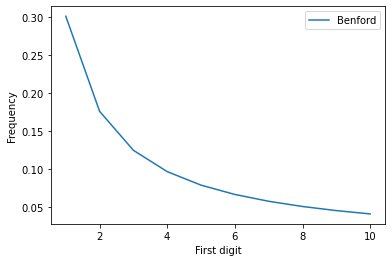

In [25]:
plt.plot(b_df, label='Benford')
plt.xlabel('First digit')
plt.ylabel('Frequency')
plt.legend(loc='upper right')

# Problem 10: Sampling datapoints to fit Benford's law

In this part of the problem, you will create artificial data that obeys Benford's Law.

Here is one way to generate datapoints that obey Benford's Law:

1. Pick a random number *r* uniformly in the range [0.0, 30.0). That is, the value is greater than or equal to 0, it is less than 30, and every value in that range is equally likely. Hint: use `random.random` or `random.uniform`.
2. Compute $e^{r}$, where e is the base of the natural logarithms, or approximately 2.71828. Hint: use math.e.
3. Generate 1000 datapoints using the above technique.

On your graph from Problem 9, draw another line, labeled “1000 samples”, that plots the frequency of the most significant digits of your 1000 samples (where each sample is the result of calculating er). Don't use the pyplot.hist routine — just use pyplot.plot, as you did above. Don't create a new graph — modify the one you made in Problem 9.

In [10]:
def generate_list(samp_size):
    sample_list = []
    e = math.e
    for i in range(samp_size):
        val = e ** random.uniform(0, 30)
        sample_list.append(val)
    return sample_list

In [18]:
samp_list = generate_list(1000)
samp_list[:10]

[5720217068.782342,
 8.911825833013456,
 594393575457.4554,
 14077833.160706444,
 29575.891366641197,
 7437601.52007411,
 19649167.438886937,
 52953.54013069416,
 357831287060.6118,
 68.81931993288534]

In [31]:
for i in range(30):
    print(random.uniform(0, 30))

17.62872034589608
16.792230608906582
28.43882815786392
29.951897083722365
15.992221593857455
13.21344709288695
24.01810184724435
4.615449964179454
15.852598630761571
25.187453102552205
21.24136074412866
2.6774343973908863
19.38571972716731
11.984706396006292
3.232616130860878
9.420277513691845
6.009028922469051
2.144817934604167
23.782307911621213
19.22727911753121
14.6049293915006
17.20777053253808
11.162904224177117
0.42923827103519496
0.37922221077487217
5.175348160837043
13.240077686852917
29.33750494334098
4.529751147483514
8.10511466933155


In [ ]:
def base_benford():
    plt.plot(b_df, label='Benford')
    plt.xlabel('First digit')
    plt.ylabel('Frequency')
    plt.legend(loc='upper right')

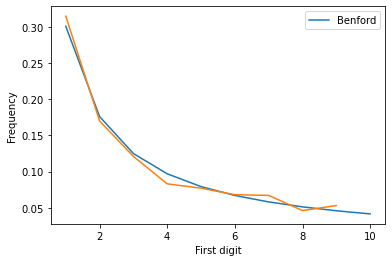

In [77]:
base_benford()
plt.plot(sig_digit_histogram(samp_list), label='1000 samples')

In [75]:
def plot_benford():
    plt.plot(b_df, label='Benford')
    plt.plot(sig_digit_histogram(samp_list), label='1000 samples')
    plt.xlabel('First digit')
    plt.ylabel('Frequency')
    plt.legend(loc='upper right')

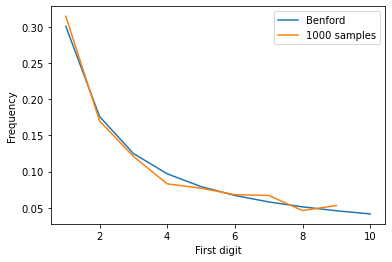

In [76]:
plot_benford()

# Problem 11: Scale invariance

On your graph from Problem 9 and 10, draw another line, where each datapoint is computed as *π* × $e^{r}$. For the label in the legend, use the string “1000 samples, scaled by $\pi$”. (The funny “$\pi$” will show up as a nicely-formatted π in the graph.)

In [78]:
math.pi

3.141592653589793

In [81]:
sig_digit_histogram([x * math.pi for x in samp_list])

,frequency
1,0.279
2,0.183
3,0.137
4,0.099
5,0.086
6,0.060
7,0.052
8,0.061
9,0.043


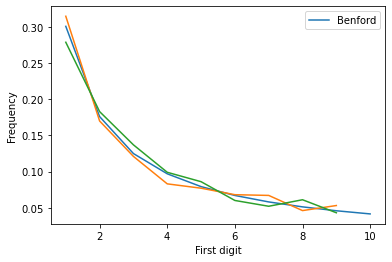

In [84]:
base_benford()
plt.plot(sig_digit_histogram(samp_list), label='1000 samples')
plt.plot(sig_digit_histogram([x * math.pi for x in samp_list]), label='1000 samples, scaled by $\pi$')

In [85]:
def plot_benford():
    plt.plot(b_df, label='Benford')
    plt.plot(sig_digit_histogram(samp_list), label='1000 samples')
    plt.plot(sig_digit_histogram([x * math.pi for x in samp_list]), label='1000 samples, scaled by $\pi$')
    plt.xlabel('First digit')
    plt.ylabel('Frequency')
    plt.legend(loc='upper right')

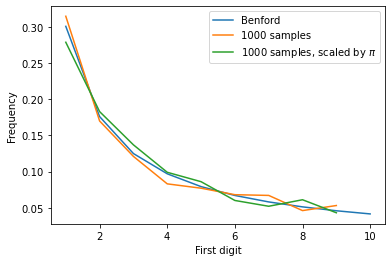

In [87]:
plot_benford()

# Problem 12: Population of U.S. cities

We wish to know whether the population of cities in the United States follows Benford's Law.

Your directory contains a file SUB-EST2009_ALL.csv with United States census data. The file is in “comma-separated values” format. You can parse this file the same was as you did in Problem 1.

Create new new plot like the one from Problem 9. It should have only the theoretical Benford's distribution, calculated as log10(1+1/d) for each digit d. Then plot on it a histogram of the frequency of the each first digit in the data from the "POPCENSUS_2000" column of the file. Label it "US (all)".

In [11]:
pop_list = pd.read_csv('homework6/SUB-EST2009_ALL.csv', usecols=['POPCENSUS_2000'])['POPCENSUS_2000']
pop_list = pd.to_numeric(pop_list, errors='coerce').dropna()
# pop_list.drop(pop_list['frequency']==0)
pop_list[:5]

0    4447100.0
1       2987.0
2       4965.0
3        723.0
4        521.0
Name: POPCENSUS_2000, dtype: float64

In [133]:
sig_digit_histogram(pop_list)

,frequency
1,0.297876
2,0.180681
3,0.119965
4,0.094260
5,0.077687
6,0.067400
7,0.057200
8,0.051696
9,0.046478


In [20]:
def plot_benford(plot_dict):
    b_dict = {}
    for i, val in enumerate(range(1,11)):
        b_dict[i+1] = benford_law(val)
    b_df = pd.DataFrame.from_dict(b_dict, orient='index', columns=['frequency'])
    plt.plot(b_df, label='Benford')
    
    for plt_name in plot_dict.keys():
        plt.plot(plot_dict[plt_name], label=plt_name)
    plt.xlabel('First digit')
    plt.ylabel('Frequency')
    plt.legend(loc='upper right')

In [135]:
test_dict = {'US(all)':sig_digit_histogram(pop_list)}

In [136]:
test_dict['US(all)']

,frequency
1,0.297876
2,0.180681
3,0.119965
4,0.094260
5,0.077687
6,0.067400
7,0.057200
8,0.051696
9,0.046478


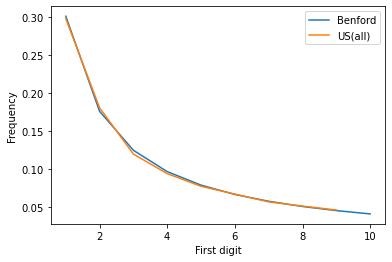

In [21]:
plot_benford({'US(all)':sig_digit_histogram(pop_list)})

# Problem 13: Population of places from literature and pop culture

The file literature-population.txt contains the populations of various places that appear in literature and pop culture. We would like to know whether these populations are characteristic of real population counts, in the sense of obeying Benford's Law equally well.

On your graph from Problem 12, plot the data from the file literature-population.txt. Label this plot "Literature Places". Notice that the data are similar to, but not exactly the same as, the the real dataset and the perfect Benford's-Law histogram.

In [29]:
def extract_data(filename, column_names):
    df = pd.read_table(filename, header=None, usecols=column_names)
    for col in df.columns:
        df[col] =  df[col].str.replace(',', '')
        df[col] = pd.to_numeric(df[col])
    vote_cts = pd.DataFrame()
    for col in df.columns:
        vote_cts = pd.concat([vote_cts, df[col]])
    vote_cts.rename(columns={0:'counts'}, inplace=True)
    return vote_cts.dropna()

In [37]:
lit_data = extract_data('homework6/literature-population.txt', [1])
lit_data['counts'] = pd.to_numeric(lit_data['counts'], errors='coerce').dropna()
lit_data.head()

In [42]:
sig_digit_histogram(lit_data['counts'])

,frequency
1,0.267857
2,0.196429
3,0.178571
4,0.089286
5,0.053571
6,0.071429
7,0.071429
8,0.053571
9,0.017857


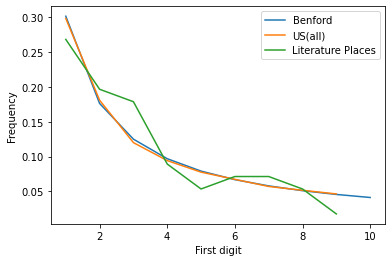

In [43]:
plot_benford({'US(all)':sig_digit_histogram(pop_list), 'Literature Places':sig_digit_histogram(lit_data['counts'])})

# Problem 14: Smaller samples have more variation

The larger a sample is, the closer it is to the ideal distribution. With smaller samples, the vagaries of random choice might lead to results that seem different than random.

Create a new graph like the one from Problem 10. Add to it plots for 10, 50, 100, and 10000 randomly-selected values or r. In other words, where in Problem 10 you used 1000 samples, here you should additionally use 10, 50, 100, and 10000. Your final graph will plot six functions. You should label these functions "10 samples", "50 samples", and so on, just as in Problem 10.

In [10]:
def generate_list(samp_size):
    sample_list = []
    e = math.e
    for i in range(samp_size):
        val = e ** random.uniform(0, 30)
        sample_list.append(val)
    return sample_list

In [50]:
plt_dict = {}
for x in [10, 50, 100, 1000, 10000]:
    plt_dict[f'{x} Samples'] = sig_digit_histogram(generate_list(x))

In [48]:
plt_dict

{'10 Samples':    frequency
 1        0.3
 2        0.1
 4        0.1
 5        0.4
 6        0.1,
 '50 Samples':    frequency
 1       0.26
 2       0.16
 3       0.20
 4       0.08
 5       0.06
 6       0.12
 7       0.04
 8       0.04
 9       0.04,
 '100 Samples':    frequency
 1       0.33
 2       0.10
 3       0.09
 4       0.10
 5       0.10
 6       0.09
 7       0.05
 8       0.07
 9       0.07,
 '1000 Samples':    frequency
 1      0.275
 2      0.188
 3      0.122
 4      0.100
 5      0.092
 6      0.071
 7      0.062
 8      0.054
 9      0.036,
 '10000 Samples':    frequency
 1     0.2994
 2     0.1802
 3     0.1237
 4     0.0952
 5     0.0842
 6     0.0644
 7     0.0532
 8     0.0531
 9     0.0466}

In [53]:
test_dict = {f'{x} Samples':sig_digit_histogram(generate_list(x)) for x in [10, 50, 100, 1000, 10000]}

In [54]:
test_dict

{'10 Samples':    frequency
 1        0.3
 2        0.3
 3        0.1
 6        0.1
 7        0.1
 8        0.1,
 '50 Samples':    frequency
 1       0.18
 2       0.14
 3       0.18
 4       0.12
 5       0.08
 6       0.12
 7       0.12
 8       0.02
 9       0.04,
 '100 Samples':    frequency
 1       0.33
 2       0.16
 3       0.13
 4       0.12
 5       0.07
 6       0.07
 7       0.03
 8       0.02
 9       0.07,
 '1000 Samples':    frequency
 1      0.292
 2      0.176
 3      0.112
 4      0.111
 5      0.079
 6      0.069
 7      0.058
 8      0.057
 9      0.046,
 '10000 Samples':    frequency
 1     0.3027
 2     0.1784
 3     0.1223
 4     0.0933
 5     0.0797
 6     0.0689
 7     0.0578
 8     0.0541
 9     0.0428}

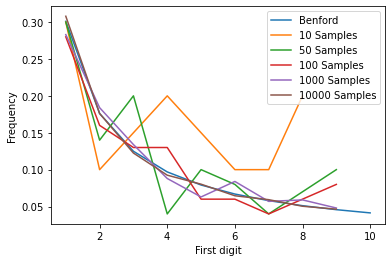

In [57]:
plt_dict = {}
for x in [10, 50, 100, 1000, 10000]:
    key = f'{x} Samples'
    plt_dict[key] = sig_digit_histogram(generate_list(x))

plot_benford(plt_dict)

# Problem 15: Comparing variation of samples

Compute the mean squared error (the MSE distance) between Benford's distribution and the histogram of first digits of populations from literature. You should obtain the result 0.00608941252081, or approximately 0.006.

This number on its own does not mean anything — we don't know whether it is unusually low, or unusually high, or about average. To find out, we need to compare it to similarly-sized sets.

Generate 10,000 sets, each of which contains population data from n US towns (n is the size of the literature dataset). Each datapoint in each set should be chosen at random from the POPCENSUS_2000 data. For each of these sets, compute its MSE distance from Benford's distribution.

Now determine how many of the US MSEs are larger than or equal to the literature MSE, how many of the US MSEs are smaller, and how many are the same as the literature MSE. Your program should print out these quantities, in the following format:

Comparison on US MSEs to literature MSE:
larger/equal: ___  
smaller: ___

In [81]:
def benford_law(val):
    return math.log10(1 + 1/val)

def benford_hist():
    b_dict = {}
    for i, val in enumerate(range(1,10)):
        b_dict[i+1] = benford_law(val)
    b_df = pd.DataFrame.from_dict(b_dict, orient='index', columns=['frequency'])
    return b_df

In [70]:
def mean_squared_error(lst1, lst2):
    return sum(np.subtract(lst1,lst2)**2)

def calculate_mse_with_uniform(histogram, data_distro):
    uniform_distro = data_distro
    return mean_squared_error(histogram, uniform_distro)

In [110]:
len(pop_list)

80490

In [145]:
index_start = random.randrange(0, len(pop_list)-56)
index_stop = index_start + 56
index_start

30972

In [148]:
def generate_pop_samp(nbr_list, size):
    index_start = random.randrange(0, len(nbr_list)-size)
    index_stop = index_start + size
    sample_list = nbr_list[index_start:index_stop]

In [50]:
def generate_list(samp_size):
    sample_list = []
    e = math.e
    for i in range(samp_size):
        val = e ** random.uniform(0, 30)
        sample_list.append(val)
    return sample_list

plt_dict = {}
for x in [10, 50, 100, 1000, 10000]:
    plt_dict[f'{x} Samples'] = sig_digit_histogram(generate_list(x))

In [90]:
calculate_mse_with_uniform(sig_digit_histogram(lit_data['counts'])['frequency'].tolist(), benford_hist()['frequency'].tolist())

0.006089412520813688

In [99]:
sig_digit_histogram(generate_list(56))['frequency'].tolist()

[0.26785714285714285,
 0.23214285714285715,
 0.08928571428571429,
 0.08928571428571429,
 0.03571428571428571,
 0.07142857142857142,
 0.08928571428571429,
 0.017857142857142856,
 0.10714285714285714]

In [100]:
sig_digit_histogram(generate_list(56))['frequency'].tolist()

[0.25,
 0.17857142857142858,
 0.125,
 0.08928571428571429,
 0.10714285714285714,
 0.05357142857142857,
 0.05357142857142857,
 0.08928571428571429,
 0.05357142857142857]

In [149]:
def generate_pop_samp(nbr_list, size):
    index_start = random.randrange(0, len(nbr_list)-size)
    index_stop = index_start + size
    sample_list = nbr_list[index_start:index_stop]
    return samp_list

In [163]:
test_pop = generate_pop_samp(pop_list, 56)
test_pop

[5720217068.782342,
 8.911825833013456,
 594393575457.4554,
 14077833.160706444,
 29575.891366641197,
 7437601.52007411,
 19649167.438886937,
 52953.54013069416,
 357831287060.6118,
 68.81931993288534,
 9249345354496.271,
 9.754921451422593,
 64.30558230543392,
 154465550839.98917,
 14694.365620958997,
 8000.033683786949,
 7237.126184757775,
 53332816214.48494,
 65782.31599696114,
 4295216676.7625885,
 504369555697.2555,
 2356.8743794727798,
 13095.133837005638,
 199479.78762586796,
 3394850173.715335,
 21293938.44198491,
 526774.00867988,
 6329478089.777344,
 9279359.545773152,
 1.0141399730994056,
 106831.47283090078,
 65.71565217082308,
 908275147.8139102,
 362138.9748895706,
 5388751376222.401,
 146814.09372649665,
 60.2164956727665,
 26710396714.134754,
 129.6221542529027,
 2072045.534485321,
 31448789.767009642,
 10449312720.703611,
 1709090802221.5854,
 20.535747670760976,
 3647.987815527737,
 22.25451572113289,
 185761824019.98703,
 1056044.544773592,
 2898792.978927311,
 45742

In [159]:
sig_digit_histogram(lit_data['counts'])['frequency'].tolist()

[0.26785714285714285,
 0.19642857142857142,
 0.17857142857142858,
 0.08928571428571429,
 0.05357142857142857,
 0.07142857142857142,
 0.07142857142857142,
 0.05357142857142857,
 0.017857142857142856]

In [160]:
benford_hist()['frequency'].tolist()

[0.3010299956639812,
 0.17609125905568124,
 0.12493873660829993,
 0.09691001300805642,
 0.07918124604762482,
 0.06694678963061322,
 0.05799194697768673,
 0.05115252244738129,
 0.04575749056067514]

In [165]:
test_hist = sig_digit_histogram(generate_pop_samp(pop_list, 56))
test_hist

,frequency
1,0.302
2,0.181
3,0.120
4,0.089
5,0.092
6,0.059
7,0.057
8,0.049
9,0.051


In [169]:
test_hist['frequency'].dtype

dtype('float64')

In [184]:
benford_hist()['frequency']

1    0.301030
2    0.176091
3    0.124939
4    0.096910
5    0.079181
6    0.066947
7    0.057992
8    0.051153
9    0.045757
Name: frequency, dtype: float64

In [170]:
mean_squared_error(test_hist['frequency'], benford_hist()['frequency'])

0.000372569206383299

In [ ]:
lit_data = extract_data('homework6/literature-population.txt', [1])
lit_data['counts'] = pd.to_numeric(lit_data['counts'], errors='coerce').dropna()

In [ ]:
pop_list = pd.read_csv('homework6/SUB-EST2009_ALL.csv', usecols=['POPCENSUS_2000'])['POPCENSUS_2000']
pop_list['counts'] = pd.to_numeric(pop_list['counts'], errors='coerce').dropna()

data_list -> lit_data -> sig_digit_histogram(lit_data['counts'])['frequency'].tolist()
uniform_hist -> benford_hist()['frequency'].tolist()
samp_data -> pop_list -> sig_digit_histogram(pop_list['counts'])['frequency'].tolist())
samp_size -> number of sample_data to return

In [175]:
'homework6/SUB-EST2009_ALL.csv'.split('.')[-1]

'csv'

In [209]:
def extract_data(filename, col_name):
    if filename.split('.')[-1] == 'csv':
        df = pd.read_csv(filename, usecols=[col_name])
    elif filename.split('.')[-1] == 'txt':
        df = pd.read_table(filename, header=None, usecols=[col_name])
    else:
        print('File types csv and txt are supported, use one of those formats')
        
    df[col_name] =  df[col_name].str.replace(',', '')
    df[col_name] = pd.to_numeric(df[col_name], errors='coerce').dropna()
    
    return df[col_name].tolist()

In [197]:
test_pop_list = extract_data('homework6/SUB-EST2009_ALL.csv', 'POPCENSUS_2000')
test_pop_list

[4447100.0,
 2987.0,
 4965.0,
 723.0,
 521.0,
 22619.0,
 17247.0,
 15008.0,
 2567.0,
 629.0,
 984.0,
 8794.0,
 354.0,
 24276.0,
 7174.0,
 1034.0,
 1780.0,
 772.0,
 290.0,
 1853.0,
 1965.0,
 2260.0,
 18967.0,
 7676.0,
 6592.0,
 42987.0,
 820.0,
 466.0,
 627.0,
 684.0,
 nan,
 224.0,
 7820.0,
 2313.0,
 1053.0,
 412.0,
 226.0,
 214.0,
 47.0,
 1238.0,
 29672.0,
 116.0,
 242820.0,
 202.0,
 1768.0,
 121.0,
 7411.0,
 369.0,
 96.0,
 920.0,
 4024.0,
 5498.0,
 2728.0,
 3640.0,
 762.0,
 1393.0,
 1483.0,
 2341.0,
 1952.0,
 3158.0,
 2257.0,
 1273.0,
 2071.0,
 82.0,
 248.0,
 987.0,
 590.0,
 1467.0,
 nan,
 3216.0,
 2466.0,
 1193.0,
 2949.0,
 1237.0,
 6364.0,
 4927.0,
 3659.0,
 7800.0,
 nan,
 501.0,
 1475.0,
 1241.0,
 2206.0,
 1115.0,
 251.0,
 360.0,
 808.0,
 1644.0,
 385.0,
 804.0,
 3316.0,
 1382.0,
 2423.0,
 1170.0,
 257.0,
 769.0,
 1546.0,
 2002.0,
 1431.0,
 363.0,
 13995.0,
 nan,
 3212.0,
 4653.0,
 16581.0,
 1371.0,
 267.0,
 60.0,
 340.0,
 53929.0,
 7540.0,
 247.0,
 612.0,
 2413.0,
 57737.0,
 1003.

In [188]:
test_data_list = extract_data('homework6/literature-population.txt', 1)
test_data_list

[130000,
 42000,
 92,
 2500,
 6000000,
 250000,
 1309,
 160000000,
 3560,
 192795,
 287000,
 35000,
 1280,
 290000,
 750000,
 1395600,
 2765321,
 2686164,
 1256565,
 2086959,
 1003,
 16661,
 4000,
 79567,
 492,
 69500,
 160000,
 32000,
 5100,
 25000,
 5000,
 8363710,
 3200000,
 1800,
 14000,
 78000000,
 2789,
 3623,
 23200,
 7012,
 6100,
 42000,
 8600000,
 85000,
 15650,
 37000,
 37000,
 42,
 30720,
 5000000,
 32900,
 38500,
 642000,
 1800000,
 130000,
 250000]

In [190]:
sig_digit_histogram(test_data_list)['frequency']

1    0.267857
2    0.196429
3    0.178571
4    0.089286
5    0.053571
6    0.071429
7    0.071429
8    0.053571
9    0.017857
Name: frequency, dtype: float64

In [204]:
def generate_pop_samp(nbr_list, size):
    index_start = random.randrange(0, len(nbr_list)-size)
    index_stop = index_start + size
    sample_list = nbr_list[index_start:index_stop]
    return sample_list

In [205]:
test = generate_pop_samp(test_pop_list, len(test_data_list))
test

[401.0,
 38.0,
 42.0,
 140.0,
 145.0,
 145.0,
 56.0,
 124.0,
 78.0,
 42.0,
 36567.0,
 36567.0,
 2149.0,
 62.0,
 218.0,
 47.0,
 51.0,
 30.0,
 53.0,
 93.0,
 97.0,
 92.0,
 92.0,
 61.0,
 42.0,
 29.0,
 377.0,
 377.0,
 196.0,
 41.0,
 59.0,
 35.0,
 1006.0,
 917.0,
 917.0,
 284.0,
 4220.0,
 16.0,
 48.0,
 49.0,
 3659.0,
 100.0,
 5102.0,
 139.0,
 56.0,
 625.0,
 28.0,
 1989.0,
 91.0,
 153.0,
 2021.0,
 38.0,
 46.0,
 139.0,
 139.0,
 67.0]

In [206]:
len(test)

56

In [203]:
len(test_data_list)

56

In [210]:
def compare_data_mse_to_samples(data_filepath, data_col, samp_filepath, samp_col, uniform_hist, samp_size):
    data_list = extract_data(data_filepath, data_col)
    samp_pop_list = extract_data(samp_filepath, samp_col)
    data_hist = sig_digit_histogram(data_list)['frequency']
    
    base_mse = mean_squared_error(data_hist, uniform_hist)
    g_or_e = 0
    l = 0
    for i in range(samp_size):
        samp_list = generate_pop_samp(samp_pop_list, len(data_list))
        samp_hist = sig_digit_histogram(samp_list)['frequency']
        s_mse = mean_squared_error(samp_hist, uniform_hist)
        print(s_mse)
        if s_mse < base_mse:
            l += 1
        else:
            g_or_e += 1
    print('Comparison on US MSEs to literature MSE:')
    print(f'larger/equal: {g_or_e}')
    print(f'smaller: {l}')

In [211]:
compare_data_mse_to_samples('homework6/literature-population.txt',
                            1,
                            'homework6/SUB-EST2009_ALL.csv',
                            'POPCENSUS_2000',
                            benford_hist()['frequency'].tolist(),
                            10000)

ValueError: invalid literal for int() with base 10: 'n'

# Problem 16: Interpret your results

Interpret your results. Is there evidence that the literature place populations were artificially generated? Answer this in your answers.txt file. Hint: you may wish to use a similar approach to that you used in Problem 9.